In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
data=pd.read_csv('Airlines+Data (1).csv')
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [3]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
data.dtypes

Month         object
Passengers     int64
dtype: object

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [6]:
data = data.set_index('Month')

In [7]:
data

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


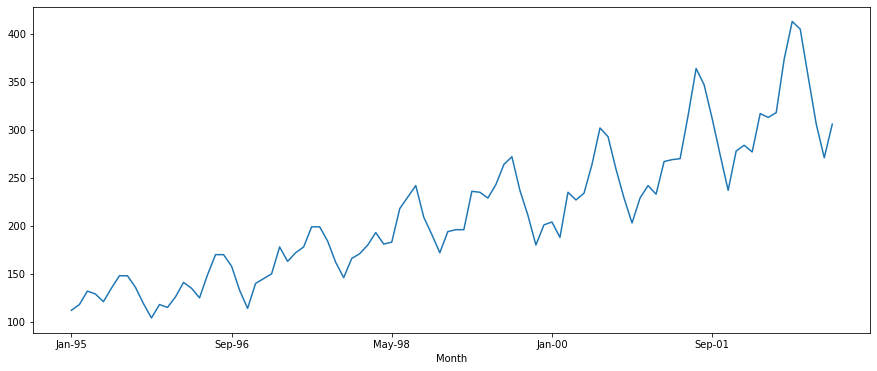

In [8]:
data['Passengers'].plot(figsize=(15, 6))
plt.show()

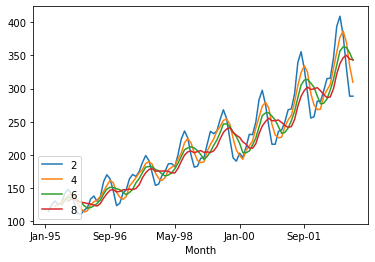

In [9]:
for i in range(2,10,2):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [10]:
X = data['Passengers'].values

In [11]:
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306], dtype=int64)

In [12]:
size = int(len(X) * 0.66)

In [13]:
train, test = X[0:size], X[size:len(X)]

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(5,1,0))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [15]:
model_fit = model.fit(disp=0)

In [16]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Wed, 20 Oct 2021   AIC                            539.817
Time:                        12:01:30   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.236      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.498      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

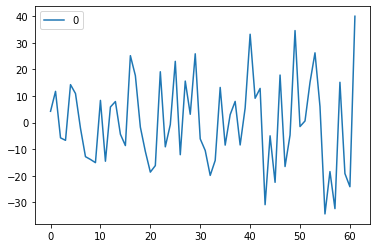

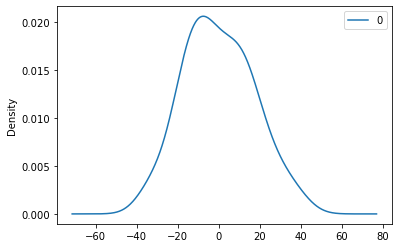

               0
count  62.000000
mean    0.057356
std    16.895802
min   -34.303296
25%   -12.610647
50%    -1.589474
75%    12.565602
max    39.955362


In [17]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [18]:
# forecast arima model

In [19]:
history = [x for x in train]

In [20]:
predictions = list()

In [21]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=239.755183, expected=227.000000
predicted=220.737321, expected=234.000000
predicted=237.815011, expected=264.000000
predicted=252.750593, expected=302.000000
predicted=306.715786, expected=293.000000
predicted=285.374627, expected=259.000000
predicted=250.264002, expected=229.000000
predicted=227.093121, expected=203.000000
predicted=211.011456, expected=229.000000
predicted=253.260277, expected=242.000000
predicted=252.490675, expected=233.000000
predicted=234.042129, expected=267.000000
predicted=268.773620, expected=269.000000
predicted=261.782267, expected=270.000000
predicted=271.798049, expected=315.000000
predicted=314.422086, expected=364.000000
predicted=368.637726, expected=347.000000
predicted=334.957873, expected=312.000000
predicted=301.161836, expected=274.000000
predicted=265.936472, expected=237.000000
predicted=244.037200, expected=278.000000
predicted=312.961790, expected=284.000000
predicted=291.748136, expected=277.000000
predicted=284.551904, expected=317

In [22]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.494


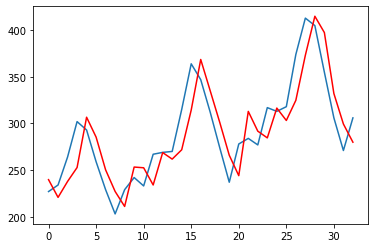

In [24]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [25]:
#line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

In [26]:
t=np.arange(1,97)

In [27]:
data['t']=t

In [28]:
data['t_sq'] = data['t']*data['t']

In [29]:
log_Passengers=np.log(data['Passengers'])

In [30]:
data['log_Passengers']=log_Passengers

In [31]:
data.head()

,Passengers,t,t_sq,log_Passengers
Month,,,,
Jan-95,112,1,1,4.718499
Feb-95,118,2,4,4.770685
Mar-95,132,3,9,4.882802
Apr-95,129,4,16,4.859812
May-95,121,5,25,4.795791


In [32]:
train1, test1 = np.split(data, [int(.67 *len(data))])

In [33]:
#linear model
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [34]:
#quadratic model
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.1895551441541

In [36]:
#exponential model
expo=smf.ols('log_Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

40.84924171132655

In [38]:
#additive seasonality
additive= smf.ols('Passengers~t',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['t']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

49.6853235132085

In [39]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t']])))
predaddlinear

Month
May-00    237.066964
Jun-00    238.997871
Jul-00    240.928777
Aug-00    242.859684
Sep-00    244.790591
Oct-00    246.721497
Nov-00    248.652404
Dec-00    250.583310
Jan-01    252.514217
Feb-01    254.445124
Mar-01    256.376030
Apr-01    258.306937
May-01    260.237843
Jun-01    262.168750
Jul-01    264.099657
Aug-01    266.030563
Sep-01    267.961470
Oct-01    269.892376
Nov-01    271.823283
Dec-01    273.754190
Jan-02    275.685096
Feb-02    277.616003
Mar-02    279.546909
Apr-02    281.477816
May-02    283.408723
Jun-02    285.339629
Jul-02    287.270536
Aug-02    289.201442
Sep-02    291.132349
Oct-02    293.063255
Nov-02    294.994162
Dec-02    296.925069
dtype: float64

In [40]:
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

49.6853235132085

In [43]:
#additive seasonality with quadratic trend
addquad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

53.1895551441541

In [45]:
#multiplicative seasonality
mulsea=smf.ols('log_Passengers~t',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['t']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

40.84924171132655

In [46]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Passengers~t',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

40.84924171132655

In [48]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Passengers~t+t_sq',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad


54.72343806475141

In [49]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0    54.723438
 1    49.685324
 2    49.685324
 3    53.189555
 4    40.849242
 5    25.503984
 6    40.849242
 7    40.849242
 8    53.189555
 dtype: float64}

In [50]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,54.723438
1,rmseadd,49.685324
2,rmseaddlinear,49.685324
3,rmseaddquad,53.189555
4,rmseexpo,40.849242
5,rmselin,25.503984
6,rmsemul,40.849242
7,rmsemulin,40.849242
8,rmsequad,53.189555
